https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
https://ww2.amstat.org/publications/jse/v19n3/decock/datadocumentation.txt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
#os.chdir('C:\\Users\\Admin\\Desktop\\Data') #Personal
os.chdir('C:\\Users\\Administrator\\Desktop\\Data')
from sklearn.feature_selection import VarianceThreshold

In [3]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None
hp=pd.read_csv('HousePricingDataset.csv')
hp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


hp=hp1.iloc[:1000,:]
hp.head()
hp.shape

In [4]:
## Find out the columns which has missing values
[col for col in hp.columns if hp[col].isnull().sum()>0]

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

## Replacing the null values

In [6]:
## Since NaN represents there is no frotange to the property hence representing as 0
hp['LotFrontage'].fillna(value=0,inplace=True)
## Replacing the null values with 'No Alley Access'
hp['Alley'].fillna(value='No Alley Access',inplace=True)
## Replacing null values with None
hp['MasVnrType'].fillna(value='None',inplace=True)
## Replacing the null values of 'MasVnrArea'  with 0 as there is MasVnrType is none
hp['MasVnrArea'].fillna(value=0,inplace=True)
hp['BsmtQual'].fillna(value='No Basement',inplace=True)
hp['BsmtCond'].fillna(value='No Basement',inplace=True)
hp['BsmtExposure'].fillna(value='No Basement',inplace=True)
hp['BsmtFinType1'].fillna(value='No Basement',inplace=True)
hp['BsmtFinType2'].fillna(value='No Basement',inplace=True)
hp['GarageType'].fillna(value='No Garage',inplace=True)
hp['GarageYrBlt'].fillna(value='9999',inplace=True)
hp['GarageFinish'].fillna(value='No Garage',inplace=True)
hp['GarageQual'].fillna(value='No Garage',inplace=True)
hp['GarageCond'].fillna(value='No Garage',inplace=True)
hp['FireplaceQu'].fillna(value='No FirePlace',inplace=True)
hp['Electrical'].fillna(value='None',inplace=True)
hp['Fence'].fillna(value='No Fence',inplace=True)
hp['PoolQC'].fillna(value='No Pool',inplace=True)
hp['MiscFeature'].fillna(value='None',inplace=True)

## Function to Identify the unique value columns

In [7]:
#len(hp['customerID'])/(hp.shape[0])
def unique_columns(dataset):
    total_rows=dataset.shape[0]
    columns=dataset.columns
    unique_columns=[]
    for i in columns:
        if len(dataset[i].unique())==total_rows:
            unique_columns.append(i)
    return unique_columns

In [8]:
unique_columns=unique_columns(hp)
unique_columns

['Id']

In [9]:
hp.drop(unique_columns,axis=1,inplace=True)

## Type Conversions

In [10]:
hp['MSSubClass']=hp['MSSubClass'].astype('object')
hp['OverallQual']=hp['OverallQual'].astype('object')
hp['OverallCond']=hp['OverallCond'].astype('object')

## Numeric and Categorical Columns Columns

In [11]:
hp_numeric=hp.select_dtypes(include=['int64','float64'])
hp_numeric.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000


In [12]:
hp_categorical=hp.select_dtypes(include=['object'])
hp_categorical.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No FirePlace,Attchd,2003,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
1,20,RL,Pave,No Alley Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1976,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
2,60,RL,Pave,No Alley Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2001,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
3,70,RL,Pave,No Alley Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,1998,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Abnorml
4,60,RL,Pave,No Alley Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2000,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal


## Constant Features

In [13]:
constant=VarianceThreshold(threshold=0)
constant.fit(hp_numeric)
constant.get_support()
non_constant_numeric=hp_numeric.columns[constant.get_support()]

In [14]:
Non_constant_categorical=[i for i in hp_categorical.columns if len(hp_categorical[i].unique())!=1]

In [15]:
hp_col=list(non_constant_numeric)+list(Non_constant_categorical)
hp=hp[hp_col]

In [16]:
hp.shape

(1460, 80)

## Quasi Constant Features

In [17]:
quasiconstant=VarianceThreshold(threshold=0.05)
quasiconstant.fit(hp_numeric)
quasiconstant.get_support()
non_quasi_constant_numeric=hp_numeric.columns[quasiconstant.get_support()]
print(non_quasi_constant_numeric)
#hp=hp[non_quasi_constant_numeric]

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [18]:
def quasi_constant_categorical(dataset):
    columns=dataset.columns
    cat_columns=[]
    for i in columns:
        #a=(dataset[i].value_counts()/np.float(len(dataset[i]))).sort_values(ascending=False)[:1]
        #index=(dataset[i].value_counts()/np.float(len(dataset[i]))).sort_values(ascending=False)[:1].index
        if list((hp_categorical[i].value_counts()/np.float(len(hp_categorical[i]))).sort_values(ascending=False)[:1])[0]<=0.95:
            cat_columns.append(i) 
    return cat_columns

In [19]:
non_quasi_constant_categorical=quasi_constant_categorical(hp_categorical)
final_non_quasi_constant=non_quasi_constant_categorical+list(non_quasi_constant_numeric)
hp=hp[final_non_quasi_constant]

In [20]:
hp.shape

(1460, 72)

In [20]:
#y=hp['SalePrice']
#hp.drop('SalePrice',axis=1, inplace=True)

## Correlation between the input variables

In [21]:
def correlation(dataset,threshold,Column):
    cor_mat=dataset.corr()
    cor_mat.drop(Column,axis=1,inplace=True)
    cor_mat.drop(Column,axis=0,inplace=True)
    correlated_variables=set()
    for i in range(len(cor_mat.columns)):
        for j in range(i):
            if abs(cor_mat.iloc[i,j])>threshold:
                colname=cor_mat.columns[i]
                correlated_variables.add(colname)
    return correlated_variables

In [22]:
correlated_variables=correlation(hp_numeric,0.65,'SalePrice')
correlated_variables

{'1stFlrSF', 'GarageArea', 'GrLivArea', 'TotRmsAbvGrd'}

In [23]:
hp.drop(labels=correlated_variables,axis=1,inplace=True)
hp_numeric.drop(labels=correlated_variables,axis=1,inplace=True)

## Second approach to identify the correlated features and groups

cor_mat=hp_numeric.corr()
cor_mat=cor_mat.abs().unstack()
cor_mat=cor_mat.sort_values(ascending=False)
cor_mat=cor_mat[cor_mat>=0.8]
cor_mat=cor_mat[cor_mat<1]
cor_mat=pd.DataFrame(cor_mat).reset_index()
cor_mat.columns=['Feature1','Feature2','correlation']
cor_mat

grouped_features_ls=[]
correlated_features=[]
for i in cor_mat['Feature1'].unique():
    if i not in grouped_features_ls:
        correlated_block=cor_mat[cor_mat['Feature1']==i]
        grouped_features_ls=grouped_features_ls+list(correlated_block['Feature2'].unique())+[i]
        correlated_features.append(correlated_block)

hp.drop(['GarageCars','TotRmsAbvGrd','TotalBsmtSF'],axis=1,inplace=True)

### Correlation between input features and output variable ('SalePrice')

In [24]:
def correlation(dataset,threshold,column):
    cor_mat=dataset.corr()
    correlated_variables=set()
    for i in cor_mat.columns:
        for j in [column]:
            if (i!=j) and (abs(cor_mat.loc[i,j])>threshold):
                correlated_variables.add(i)
    return correlated_variables

In [25]:
correlation(hp_numeric,0.65,'SalePrice')
#cor_mat.columns[0]

set()

In [26]:
hp_numeric.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Exploratory Data Analysis

In [27]:
percentile_col={}
for i in ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']:
    percentile_col[i]={}
    for j in range(0,100):
        per=np.percentile(hp[i],j)
        percentile_col[i][j]=per

In [28]:
percentile_col_df=pd.DataFrame(percentile_col)
percentile_col_df

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.00,1300.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,1.00,2006.0,34900.00
1,0.00,1680.00,1899.18,1950.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,1.00,2006.0,61815.97
2,0.00,2124.74,1908.36,1950.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,1.00,2006.0,79000.00
3,0.00,2522.00,1910.00,1950.00,0.00,0.00,0.00,0.00,312.33,0.00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,1.00,2006.0,82000.00
4,0.00,3095.04,1914.36,1950.00,0.00,0.00,0.00,0.00,446.48,0.00,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,2.00,2006.0,85000.00
5,0.00,3311.70,1916.00,1950.00,0.00,0.00,0.00,0.00,519.30,0.00,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,2.00,2006.0,88000.00
6,0.00,3862.52,1919.54,1950.00,0.00,0.00,0.00,0.00,546.00,0.00,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,2.00,2006.0,91500.00
7,0.00,4119.56,1920.00,1950.00,0.00,0.00,0.00,0.00,576.00,0.00,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,2.00,2006.0,96565.00
8,0.00,4426.00,1920.00,1950.00,0.00,0.00,0.00,0.00,600.00,0.00,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,3.00,2006.0,100000.00
9,0.00,4576.89,1922.31,1950.00,0.00,0.00,0.00,36.62,624.00,0.00,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,3.00,2006.0,103724.00


#Verifying the Lot Area

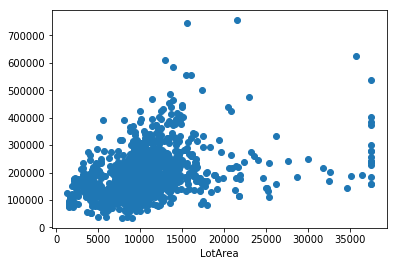

(array([ 54.,  77., 139., 541., 432., 139.,  33.,  20.,   3.,  22.]),
 array([ 36.05551275,  51.83233491,  67.60915708,  83.38597924,
         99.1628014 , 114.93962356, 130.71644572, 146.49326788,
        162.27009004, 178.0469122 , 193.82373436]),
 <a list of 10 Patch objects>)

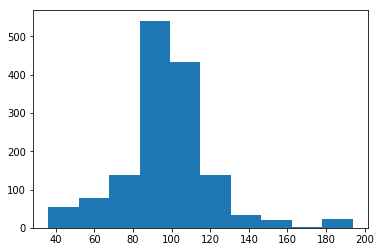

In [29]:
hp.loc[hp['LotArea']>37567.64,'LotArea']=37567.64
plt.scatter(hp['LotArea'],hp['SalePrice'])
plt.xlabel('LotArea')
plt.show()
plt.hist(np.sqrt(hp['LotArea']))

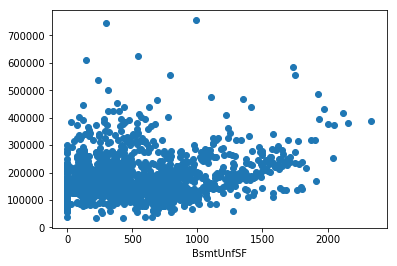

In [30]:
#hp.loc[hp['LotArea']>21571.80,'LotArea']=21571.80
plt.scatter(hp['BsmtUnfSF'],hp['SalePrice'])
plt.xlabel('BsmtUnfSF')
plt.show()


hp['BsmtUnfSF']=np.sqrt(hp['BsmtUnfSF'])

bins_lotfontage = [0,21,50, 75, 100, 313]
labels_lotfontage = [1,2,3,4,5]
hp['LotFrontage_binned'] = pd.cut(hp['LotFrontage'], bins=bins_lotfontage, labels=labels_lotfontage)

bins_MasVnrArea = [0,21,50, 75, 100, 313]
labels_MasVnrArea = [1,2,3,4,5]
hp['MasVnrArea_binned'] = pd.cut(hp['MasVnrArea'], bins=bins_MasVnrArea, labels=labels_MasVnrArea)

hp.loc[hp['MasVnrArea']>400,'MasVnrArea']=400

numeric_columns=['MasVnrArea','BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','Age']
for i in numeric_columns:
    print('Column ',i)
    sns.boxplot(hp[i])
    plt.show()
    sns.distplot(hp[i])
    plt.show()
    plt.hist(hp[i])
    plt.show()

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import seaborn as sns

hp_categorical.columns

#plt.barplot(hp['MSSubClass'],hp['MSZoning'],width=0.5, color="blue")
sns.barplot(hp['MSSubClass'],hp['MSZoning'])

sns.FacetGrid(hp_categorical,hue='Street',size=3)\
    .map(sns.barplot,'MSSubClass','MSZoning')\
    .add_legend();
plt.show()

In [31]:
#for i in hp_categorical.columns:
#    sns.boxplot(hp[i],y)
#    plt.show()

In [31]:
## After Exploratory Data Analysis on the data based on boxplots
hp.drop(['LotShape','LotConfig','LandSlope','Functional'],axis=1,inplace=True)

In [32]:
hp.columns

Index(['MSSubClass', 'MSZoning', 'Alley', 'LandContour', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'SaleType', 'SaleCondition', 'LotFrontage', 'LotArea', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

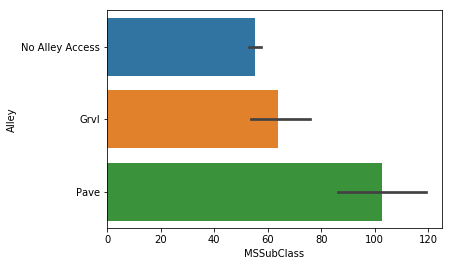

In [33]:
sns.barplot(hp['MSSubClass'],hp['Alley'])

In [34]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
ord_encoding=defaultdict(LabelEncoder)
ordinal_columns=['OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2','HeatingQC','Electrical','KitchenQual','FireplaceQu','GarageFinish','GarageQual', 'GarageCond', 'PavedDrive', 'Fence']
for i in ordinal_columns:
    encoded_df=pd.DataFrame()
    d=pd.DataFrame(ord_encoding[i].fit_transform(hp[i]))
    d.columns=[i]
    encoded_df=pd.concat([encoded_df,d],axis=1)
    hp.drop(i,axis=1, inplace=True)
    hp=pd.concat([hp,encoded_df],axis=1)
    

In [35]:
columns=['Exterior1st', 'Exterior2nd']
j=0
for i in range(len(hp['Exterior1st'])):
    if hp['Exterior1st'][i]!=hp['Exterior2nd'][i]:
        j+=1
print('total # of rows where the values in Exterior1st, Exterior2nd is ',j)
hp.drop('Exterior2nd',axis=1,inplace=True)

total # of rows where the values in Exterior1st, Exterior2nd is  215


In [36]:
columns=['MSSubClass','MSZoning','Neighborhood','HouseStyle','Condition1','SaleType','Foundation','Exterior1st']
Nominal_Class_dict={}
for i in columns:
    Percentages=(hp[i].value_counts()/hp[i].value_counts().sum())
    Nominal_Class_dict[i]={}
    for j in Percentages.index:
        Nominal_Class_dict[i][j]=Percentages[j]
   
    
Nominal_Class_dict

{'MSSubClass': {20: 0.36712328767123287,
  60: 0.2047945205479452,
  50: 0.09863013698630137,
  120: 0.05958904109589041,
  30: 0.04726027397260274,
  160: 0.04315068493150685,
  70: 0.0410958904109589,
  80: 0.03972602739726028,
  90: 0.03561643835616438,
  190: 0.02054794520547945,
  85: 0.0136986301369863,
  75: 0.010958904109589041,
  45: 0.00821917808219178,
  180: 0.00684931506849315,
  40: 0.0027397260273972603},
 'MSZoning': {'RL': 0.7883561643835616,
  'RM': 0.14931506849315068,
  'FV': 0.04452054794520548,
  'RH': 0.010958904109589041,
  'C (all)': 0.00684931506849315},
 'Neighborhood': {'NAmes': 0.1541095890410959,
  'CollgCr': 0.10273972602739725,
  'OldTown': 0.0773972602739726,
  'Edwards': 0.0684931506849315,
  'Somerst': 0.0589041095890411,
  'Gilbert': 0.05410958904109589,
  'NridgHt': 0.05273972602739726,
  'Sawyer': 0.050684931506849315,
  'NWAmes': 0.05,
  'SawyerW': 0.04041095890410959,
  'BrkSide': 0.03972602739726028,
  'Crawfor': 0.03493150684931507,
  'Mitchel'

In [37]:
for i in columns:
    for j in range(len(hp[i])):
        value_org=hp[i][j]
        if Nominal_Class_dict[i][value_org]>0.05:
            hp[i][j]=value_org
        else:
            hp[i][j]='New'
    

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [42]:
## This code is for a single columns
#MSSubClass_dict={}
#for i in MsSubClass_Percentages.index:
#        MSSubClass_dict[i]=MsSubClass_Percentages[i]

In [38]:
for i in columns:
    print(hp[i].unique())

[60 20 'New' 50 120]
['RL' 'RM' 'New']
['CollgCr' 'New' 'Somerst' 'OldTown' 'Sawyer' 'NridgHt' 'NAmes' 'Edwards'
 'Gilbert']
['2Story' '1Story' '1.5Fin' 'New']
['Norm' 'Feedr' 'New']
['WD' 'New']
['PConc' 'CBlock' 'BrkTil' 'New']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'New' 'Plywood']


In [39]:
hp['Remodelled']=hp['YearRemodAdd'] - hp['YearBuilt']

In [40]:
hp['Hand']=hp['YrSold']-hp['YearBuilt']

In [41]:
for i in range(len(hp['Hand'])):
    if hp['Hand'][i]==0:
        hp['Hand']='First'
    else:
        hp['Hand']='Second'

In [42]:
for i in range(len(hp['Remodelled'])):
    if  hp['Remodelled'][i]==0:
        hp['Remodelled'][i]='Old'
    else:
        hp['Remodelled'][i]='Remodelled'

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

In [43]:
from sklearn.preprocessing import LabelBinarizer
from collections import defaultdict
import pandas as pd
encoding=defaultdict(LabelBinarizer)
columns_nominal=['Remodelled','Hand','Alley', 'LandContour','BldgType','RoofStyle', 'GarageType','MasVnrType','CentralAir','SaleCondition','MSZoning','Neighborhood','Exterior1st','HouseStyle','Condition1','SaleType','Foundation']
for i in columns_nominal:
    encoded_df=pd.DataFrame()
    d=pd.DataFrame(encoding[i].fit_transform(hp[i]))
    test_column=d.columns.values
    list1=[i+'_'+str(j) for j in test_column]
    d.columns=list1
    encoded_df=pd.concat([encoded_df,d],axis=1)
    hp.drop(i,axis=1, inplace=True)
    hp=pd.concat([hp,encoded_df],axis=1)

In [44]:
hp['Age']=2018-hp['YearBuilt']

In [45]:
hp.drop(['MSSubClass','YearBuilt','YearRemodAdd','YrSold'],axis=1,inplace=True)

In [51]:
#X_train.isnull().sum()
#hp.drop(['LotFrontage_binned','MasVnrArea_binned'],axis=1,inplace=True)

In [47]:
from sklearn.preprocessing import MinMaxScaler
#Minmax=MinMaxScaler(feature_range=(0, 1), copy=True)
from collections import defaultdict
encoding=defaultdict(MinMaxScaler)
columns_integer=['LotArea','BsmtUnfSF','LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','2ndFlrSF','WoodDeckSF','OpenPorchSF','Age']
for i in columns_integer:
    encoded_df=pd.DataFrame()
    d=pd.DataFrame(encoding[i].fit_transform(pd.DataFrame(hp[i])))
    
    #test_column=d.columns.values
    #list1=[i+'_'+str(j) for j in test_column]
    d.columns=[i]
    encoded_df=pd.concat([encoded_df,d],axis=1)
    hp.drop(i,axis=1, inplace=True)
    hp=pd.concat([hp,encoded_df],axis=1)


In [53]:
from sklearn.preprocessing import MinMaxScaler
#Minmax=MinMaxScaler(feature_range=(0, 1), copy=True)
from collections import defaultdict
encoding_saleprice=defaultdict(MinMaxScaler)
columns_integer=['SalePrice']
for i in columns_integer:
    encoded_df=pd.DataFrame()
    d=pd.DataFrame(encoding_saleprice[i].fit_transform(pd.DataFrame(hp[i])))
    
    #test_column=d.columns.values
    #list1=[i+'_'+str(j) for j in test_column]
    d.columns=[i]
    encoded_df=pd.concat([encoded_df,d],axis=1)
    hp.drop(i,axis=1, inplace=True)
    hp=pd.concat([hp,encoded_df],axis=1)


In [48]:
X_train_backup=hp.copy()

In [49]:
hp['SalePrice'].max()

755000

In [50]:
y=hp['SalePrice']
hp.drop('SalePrice',axis=1,inplace=True)

In [51]:
hp.shape

(1460, 112)

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(hp,y,test_size=0.3,random_state=34)
#X_train=X_train.reset_index()
#X_test=X_test.reset_index()

In [53]:
X_train.head()

,GarageYrBlt,TotalBsmtSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,Remodelled_0,Hand_0,Alley_0,Alley_1,Alley_2,LandContour_0,LandContour_1,LandContour_2,LandContour_3,BldgType_0,BldgType_1,BldgType_2,BldgType_3,BldgType_4,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofStyle_3,RoofStyle_4,RoofStyle_5,GarageType_0,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageType_5,GarageType_6,MasVnrType_0,MasVnrType_1,MasVnrType_2,MasVnrType_3,CentralAir_0,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5,MSZoning_0,MSZoning_1,MSZoning_2,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior1st_5,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,Condition1_0,Condition1_1,Condition1_2,SaleType_0,Foundation_0,Foundation_1,Foundation_2,Foundation_3,LotArea,BsmtUnfSF,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,2ndFlrSF,WoodDeckSF,OpenPorchSF,Age
512,1964,864,0,1,0,1,0,3,0,2,0,0,0,0,0,7,4,4,3,4,4,4,3,1,3,4,5,3,3,3,5,5,2,4,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0.215068,0.072346,0.223642,0.000,0.092310,0.118046,0.000000,0.000000,0.000000,0.376812
343,2005,1684,0,0,0,2,0,2,1,2,0,0,0,0,0,7,8,4,0,4,0,4,3,2,6,0,5,0,0,2,5,5,2,4,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0.208147,0.708904,0.201278,0.385,0.004961,0.000000,0.000000,0.577596,0.131627,0.036232
290,2006,1079,0,0,0,2,1,3,1,2,0,0,0,0,0,7,7,4,2,4,2,4,0,6,6,0,5,2,2,2,2,5,2,4,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0.394594,0.461901,0.383387,0.000,0.000000,0.000000,0.406780,0.000000,0.093236,0.028986
163,9999,882,0,0,0,1,0,1,0,0,0,0,0,0,0,4,3,5,3,4,4,4,3,6,6,0,5,3,3,1,3,3,2,2,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0.115806,0.377568,0.175719,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.391304
234,2002,860,0,1,0,2,1,4,2,2,0,0,0,0,0,5,5,4,2,4,2,4,3,2,6,0,5,2,5,0,5,5,2,4,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0.180629,0.100599,0.000000,0.000,0.110737,0.000000,0.532688,0.336056,0.087751,0.057971


In [54]:
from sklearn.linear_model import LinearRegression

In [71]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test)
## Calculating Residuals
residuals=pred_lr-y_test

## MSE
mse=np.mean((pred_lr-y_test)**2)
print('mse of the linear model is ',mse)

## Evaluating r-square
print('R-square of the linear model is ',lr.score(X_train,y_train))

## Evaluating adjusted R-square
yhat = lr.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
#print r_squared, adjusted_r_squared
print('Adjusted R-square of the linear model is ',adjusted_r_squared)
print('R-square of the linear model is ',r_squared)

mse of the linear model is  2274986496.191879
R-square of the linear model is  0.8949491221342465
Adjusted R-square of the linear model is  0.854490991674691
R-square of the linear model is  0.8917839182935345


0.8949491221342465